# Introduction to Machine Learning, UZH 2018, Group Project
### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch
##       
# 3. Classification / Prediction 
# A. with Multiple Logistic Regression

In this section we use the feature matrices and response vectors with features selected in chapter 2.  

#### We use two different versions (created in chapter 1, features-selected in chapter 2):
Version 1: Feature Matrix consists only of the Ratios                                                                        
Version 2: Feature Matrix consists of Ratios + dummy variables for seasonality + other market data
####  We will do Classification and Prediction with Single and Multiple Regression


In [1]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics

plt.style.use("seaborn-whitegrid")
%matplotlib inline 

## 3.0. SETTINGS:

### (1) Choose the Dataset Version you want

##### Reduced Feature Matrix (Features pre-selected)
VERSION = 1; Reduced Feature Matrix with only ratios                                  
VERSION = 2;  Reduced Feature Matrix with ratios + saisonality + other market data

In [2]:
### Choose which dataset version you want the selection of features and the prediction to be based on 
VERSION = 1.1
"""
INSERT NUMBER 1.1 or 2.1
"""


# Defining sel_state variable for usage later and printing text according to your choise   
if VERSION == 1.1:
    sel_version = 'based on reduced Dataset with only Ratios as predictive Features.'
elif VERSION == 2.1:
    sel_version = 'based on reduced Dataset with Ratios + Seasonality + other Market   Data as predictive Features.'
else: raise ValueError('VERSION must be either 1.1 or 2.1')
print('You chose VERSION '+str(VERSION)+' as working dataset. '+'\n'+'The following Classification/ Prediction will be therefore ' 
          + sel_version)

You chose VERSION 1.1 as working dataset. 
The following Classification/ Prediction will be therefore based on reduced Dataset with only Ratios as predictive Features.


### (2) Choose which method you want to have the features been pre-selected with
SELECTON  = RF ; Features pre-selected with Random Forest Classifier                                                           
SELECTION = PCA; Features pre-selected with Principal Component Analysis (PCA)

In [3]:
### Choose whether you want the datasets with features selected with RF or PCA
SELECTION = 'RF'
"""
INSERT 'RF' OR 'PCA'
"""


# Define sel_state variable for easier printing out    
if SELECTION == 'RF':
    sel_feat = 'Random Forest (RF)'
elif SELECTION == 'PCA':
    sel_feat = 'Principal Component Analysis (PCA)'
else: raise ValueError('SELECTION must be either RF or PCA')
briefing = ('You chose dataset VERSION '+str(VERSION)+' and SELECTION method '+str(SELECTION)+'.'+'\n'+'Features therefore pre-selected with '+str(sel_feat)+'.')
#print(sel_feat)
print('You chose SELECTION method '+str(sel_feat)+'.')

You chose SELECTION method Random Forest (RF).


### (3) SUMMARY OF SETTINGS

In [4]:
print(briefing, '\n')
print('VERSION '+str(VERSION)+' is '+str(sel_version),'\n')
print('You are now done with the Settings. You can run the whole Code now by Default.')

You chose dataset VERSION 1.1 and SELECTION method RF.
Features therefore pre-selected with Random Forest (RF). 

VERSION 1.1 is based on reduced Dataset with only Ratios as predictive Features. 

You are now done with the Settings. You can run the whole Code now by Default.


## 3.1. Preparation

### 3.1.1. Import the Response Vector and the Feature Matrix

In [5]:
# import Data (already splitted to train/test-data and selected features-> bc_randomforest_feature_selection)
if VERSION == 1.1:
    if SELECTION == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_train_f.csv', sep=',')
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_test_f.csv', sep=',')
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_train_f.csv', sep=',')
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_test_f.csv', sep=',')
    elif SELECTION == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_test_p.csv', sep=',', header=0)
elif VERSION == 2.1:
    if SELECTION == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_train_f.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_test_f.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_train_f.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_test_f.csv', sep=',', header=0)
    elif SELECTION == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_test_p.csv', sep=',', header=0)
else: raise ValueError('_VERSION_ value must be either 1.1 or 2.1, _SELECTION_ must be either RF or PCA')   

### 3.1.2. Print out Shape and Form of Feature Matrix and Response Vector


### Train Set

In [6]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# print properties and head of datasets
print('Shape (rows, columns) of Feature Matrix X (Train) ' + '=' + str(X_train_s.shape),'\n')
print('Feature Matrix X (Train) with Selected Features')
display(X_train_s[0:3])
print("")
print('Response Vector y (Train) after Feature Selection')
display(y_train_s[0:3])
print("")

Features Selected with Random Forest (RF)
Version 1.1; based on reduced Dataset with only Ratios as predictive Features. 

Shape (rows, columns) of Feature Matrix X (Train) =(2836, 20) 

Feature Matrix X (Train) with Selected Features


,pe_op_dil,pe_op_basic,CAPEI,pe_exi,pcf,divyield,bm,PEG_ltgforward,ptb,pe_inc,PEG_1yrforward,evm,ps,fcf_ocf,invt_act,at_turn,pretret_noa,gpm,dpr,PEG_trailing
0,15.633,15.468,20.773,18.484,9.957,0.0354,0.547,5.963,1.811,18.484,13.678,10.644,3.703,0.932,0.108,0.291,0.332,0.843,0.623,1.181
1,17.296,17.203,25.089,39.232,8.509,0.0398,0.461,5.702,2.189,39.232,1.521,9.246,0.689,0.441,0.368,0.815,0.146,0.201,2.175,0.668
2,9.209,9.135,12.337,13.062,1.993,0.0268,0.911,2.248,1.076,13.062,0.380,12.474,2.034,1.000,0.152,0.044,0.357,0.906,0.337,3.048



Response Vector y (Train) after Feature Selection


,0
0,0
1,1
2,0


### Test Set

In [7]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# print properties and head of datasets
print('Shape (rows, columns) of Feature Matrix X (Test) ' + '=' + str(X_test_s.shape),'\n')
print('Feature Matrix X (Train) with Selected Features')
display(X_test_s[0:3])
print("")
print('Response Vector y (Test) after Feature Selection')
display(y_test_s[0:3])
print("")

Features Selected with Random Forest (RF)
Version 1.1; based on reduced Dataset with only Ratios as predictive Features. 

Shape (rows, columns) of Feature Matrix X (Test) =(710, 20) 

Feature Matrix X (Train) with Selected Features


,pe_op_dil,pe_op_basic,CAPEI,pe_exi,pcf,divyield,bm,PEG_ltgforward,ptb,pe_inc,PEG_1yrforward,evm,ps,fcf_ocf,invt_act,at_turn,pretret_noa,gpm,dpr,PEG_trailing
0,16.224,16.127,20.983,16.224,10.484,0.0187,0.254,1.330,4.189,16.224,1.414,8.585,3.318,0.863,0.025,0.828,1.148,0.428,0.287,1.022
1,16.489,16.311,21.663,18.555,7.709,0.0122,0.235,1.572,4.281,18.555,1.737,13.619,2.379,0.902,0.157,0.223,0.358,0.279,0.199,1.147
2,9.520,9.520,16.327,15.681,8.490,0.0343,0.513,6.149,2.198,15.550,-0.973,6.716,3.293,0.934,0.078,0.355,0.396,0.903,0.792,1.022



Response Vector y (Test) after Feature Selection


,0
0,1
1,0
2,1


## 3.2. Simple Logistic Regression (statsmodels) (SLM)

### 3.2.1. Preparation and fitting (on Training Set) , define BEST FEATURE (SLM)

In [8]:
# best feature selection taking the column name
colNms = X_train_s.columns.values
colNms[0]

'pe_op_dil'

In [9]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# Run Simple Logistic Regression
# Logistic Regression (with the most important feature from feature selection)
# Assign "best_feature" to matrix X and response to y, acording to chosen Version of datasets and feature Selection method
pca_error = ('ERROR: PCA best feature not defined (PCA is unlabeled)! Thus no Simple Regression available.'+'\n'+'Proceed to Multiple Regression in chapter 3.3.')
if VERSION == 1.1:
    if SELECTION == 'RF':
        best_feature = colNms[0]
        logReg = sm.Logit(endog = y_train_s, exog= sm.add_constant(X_train_s[best_feature])).fit()
    elif SELECTION == 'PCA':
        best_feature = None
        print(pca_error)
elif VERSION == 2.1:
    if SELECTION == 'RF':
        best_feature = colNms[0]
        logReg = sm.Logit(endog = y_train_s, exog= sm.add_constant(X_train_s[best_feature])).fit()
    elif SELECTION == 'PCA':
        best_feature = None
        print(pca_error)
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')

Features Selected with Random Forest (RF)
Version 1.1; based on reduced Dataset with only Ratios as predictive Features. 

Optimization terminated successfully.
         Current function value: 0.676443
         Iterations 6


### 3.2.2. Summary (SLM)

In [10]:
# Workaround solution for error ("AttributeError: module 'scipy.stats' has no attribute 'chisqprob'")
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [11]:
# LogReg with only one feature as exogen variable
if SELECTION == 'RF':
    print(logReg.summary(),'\n')
    print('logReg pvalues: '+'\n')
    print(logReg.pvalues)
elif SELECTION == 'PCA':
    print(pca_error)
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 2836
Model:                          Logit   Df Residuals:                     2834
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Apr 2018   Pseudo R-squ.:                0.005303
Time:                        21:33:34   Log-Likelihood:                -1918.4
converged:                       True   LL-Null:                       -1928.6
                                        LLR p-value:                 6.106e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.088      0.136      0.892      -0.161       0.185
pe_op_dil      0.0206      0.005      3.889      0.000       0.010       0.031

logReg pvalues: 

const        0.891694
pe_op_dil  

### 3.2.3. Assessing Output (SLM)

### Hypothesis testing / Confidence Interval

In [12]:
significance_level = 0.01

if SELECTION == 'RF':
    print(str(int(100 - significance_level*100)) + '% Confidence Interval (Significance Level ' 
          + str(int(significance_level*100)) + '%)')
    display(logReg.conf_int(alpha=significance_level))
elif SELECTION == 'PCA':
    print(pca_error)
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')

99% Confidence Interval (Significance Level 1%)


,0,1
const,-0.215386,0.239428
pe_op_dil,0.006959,0.034256


### 3.2.2. Prediction (SML)

### I: In-sample Prediction of probability for returns going UP in the next period (predict y_train)


#### Prediction of whole Response Vector (Train) based on all available values of the single chosen feature (Train)

In [14]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# X must include 1 in first column for intercept
# we wish to get the probability of 'UP' (=1) for the whole test set
if SELECTION == 'RF':
    pred_train_all = logReg.predict(sm.add_constant(X_train_s[best_feature]))
    print('Predicted probability of price going UP for whole Feature Train Set is: ')
    display(pred_train_all.head(3))
    print('Actual Response Vector y_train is:')
    display(y_train_s.head(3))
elif SELECTION == 'PCA':
    print(pca_error)
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')

Features Selected with Random Forest (RF)
Version 1.1; based on reduced Dataset with only Ratios as predictive Features. 

Predicted probability of price going UP for whole Feature Train Set is: 


0    0.582776
1    0.591085
2    0.550279
dtype: float64

Actual Response Vector y_train is:


,0
0,0
1,1
2,0


### ii: New-sample Prediction of probability for returns going UP in the next period (predict y_test)

#### ONE prediction For ONE specific chosen value of predictive variable


In [15]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')
print('Chosen best feature = ' + str(best_feature))

#### Choose value fo chosen best feature manually
# Here: chosen median of feature values + /3 of median of feature values
bfv = np.median(X_train_s[best_feature])+ np.median(X_train_s[best_feature])/3
#bfv = np.mean(X_train_s[best_feature])
#bfv = np.median(X_train_s[best_feature])

# Loop for Version differenciation
# X must include 1 in first column for intercept
# we wish to get the probability of 'UP' (=1) for a best_feature_value of USD 15
if VERSION == 1.1:
    if SELECTION == 'RF':
        best_feature_value = bfv
        print('Chosen value of best feature = ' + str(best_feature_value),'\n')
        pred_test_one = logReg.predict([1, best_feature_value])
        ratio_response_train = y_train_s.sum() / y_train_s.size
        print('Predicted probability of price going UP with chosen ' + str(best_feature) + ' value is: '
              + str("%.4f" % round(float(pred_test_one*100),4)) + '%'+'\n')
        print('Actual Ratio of "UP" (Train)  =  ' + str("%.4f" % round(float(ratio_response_train*100),4)) + '%')
    elif SELECTION == 'PCA':
        print(pca_error)  
elif VERSION == 2.1:
        if SELECTION == 'RF':
            best_feature_value = bfv
            print('Chosen value of best feature = ' + str(best_feature_value),'\n')
            pred_test_one = logReg.predict([1, best_feature_value])
            ratio_response_train = y_train_s.sum() / y_train_s.size
            print('Predicted probability of price going UP with chosen ' + str(best_feature) + ' value is: '
                  + str("%.4f" % round(float(pred_test_one*100),4)) + '%')
            print('Ratio of "UP" (Train)  =  ' + str("%.4f" % round(float(ratio_response_train*100),4)) + '%')
        elif SELECTION == 'PCA':
            print(pca_error)
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA.')

Features Selected with Random Forest (RF)
Version 1.1; based on reduced Dataset with only Ratios as predictive Features. 

Chosen best feature = pe_op_dil
Chosen value of best feature = 19.801333333333336 

Predicted probability of price going UP with chosen pe_op_dil value is: 60.3503%

Actual Ratio of "UP" (Train)  =  58.0748%


#### Prediction of whole Response Vector (Test) based on all available values of the single chosen feature (Test)

In [16]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# we wish to get the probability of 'UP' (=1) for the whole test set
if SELECTION == 'RF':
    pred_test_all = logReg.predict(sm.add_constant(X_test_s[best_feature]))
    print('Predicted probability of price going UP for whole Feature Test Set is: '+'\n')
    display(pred_test_all.head(3))
    print('Actual Response Vector y_train is:')
    display(y_test_s.head(3))
elif SELECTION == 'PCA':
    print(pca_error)
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')    

Features Selected with Random Forest (RF)
Version 1.1; based on reduced Dataset with only Ratios as predictive Features. 

Predicted probability of price going UP for whole Feature Test Set is: 



0    0.585735
1    0.587059
2    0.551864
dtype: float64

Actual Response Vector y_train is:


,0
0,1
1,0
2,1


### 3.2.3. Plot Results for Training Set (SLM)

Features Selected with Random Forest (RF)
Version 1.1; based on reduced Dataset with only Ratios as predictive Features. 

Chosen best feature = pe_op_dil


array([0.58277628, 0.59108472, 0.55027876, ..., 0.5900433 , 0.59439287,
       0.56814193])

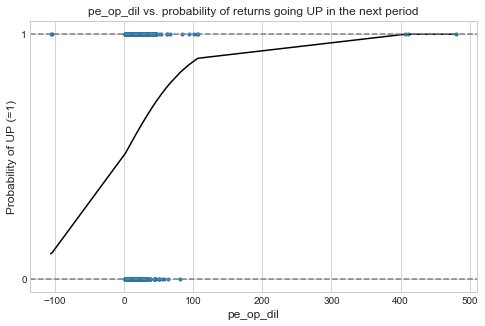

In [23]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')
print('Chosen best feature = ' + str(best_feature))

display(logReg.predict())
# Plot scatter and log.Reg
if SELECTION == 'RF':
    
    # Transfer best_feature column an prediction for response vector in a newly made dataframe "res"
    res = pd.DataFrame()
    res['best_feature'] = X_train_s[best_feature]
    res['probability'] = logReg.predict()
    # Sort results by values of the best_feature column
    res = res.sort_values('best_feature')

    # Plot
    plt.figure(figsize =(8,5))
    plt.title(str(best_feature) + ' vs. probability of returns going UP in the next period');
    plt.scatter(X_train_s[best_feature], y_train_s, marker ='.')
    plt.plot(res.best_feature, res.probability, c = 'k')
    plt.axhline(y=0, color = "gray", linestyle = "dashed")
    plt.axhline(y=1, color = "gray", linestyle = "dashed")
    plt.ylabel("Probability of UP (=1)", fontsize =12)
    plt.xlabel(str(best_feature), fontsize =12)
    
elif SELECTION == 'PCA':
    print(pca_error)
    
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')  

## 3.3. Multiple Logistic Regression with n pre-selected features (MLR1)

### 3.3.1. Preparation and fitting (on Training Set) (MLR1)

In [24]:
## Multiple Log. Regression (with all n best features chosen in Chapter 2 in the feature selection process)
logReg_m = sm.Logit(endog = y_train_s, exog = sm.add_constant(X_train_s)).fit() 

Optimization terminated successfully.
         Current function value: 0.652419
         Iterations 8


### 3.3.2. Summary (MLR1)

In [25]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')
print("Multiple Logistic Regression with all selected features"+'\n')

# Workaround solution for error ("AttributeError: module 'scipy.stats' has no attribute 'chisqprob'")
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Run Multiple Logistic Regression
print(logReg_m.summary().tables[0])
print(logReg_m.summary().tables[1])

Features Selected with Random Forest (RF)
Version 1.1; based on reduced Dataset with only Ratios as predictive Features. 

Multiple Logistic Regression with all selected features

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 2836
Model:                          Logit   Df Residuals:                     2815
Method:                           MLE   Df Model:                           20
Date:                Sun, 15 Apr 2018   Pseudo R-squ.:                 0.04063
Time:                        21:42:28   Log-Likelihood:                -1850.3
converged:                       True   LL-Null:                       -1928.6
                                        LLR p-value:                 3.218e-23
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.7

### 3.3.3. Assessing Output (MLR1)

### Hypothesis testing / Confidence Interval

In [26]:
significance_level = 0.01

# Print Confidence Interval with Title
print(str(int(100 - significance_level*100)) + '% Confidence Interval (Significance Level ' 
      + str(int(significance_level*100)) + '%)')
display(logReg_m.conf_int(alpha=significance_level))

99% Confidence Interval (Significance Level 1%)


,0,1
const,-1.685629,0.265802
pe_op_dil,-0.162973,0.461252
pe_op_basic,-0.440205,0.175896
CAPEI,-0.001153,0.014348
pe_exi,-0.005902,0.017456
pcf,-0.008697,0.013747
divyield,-30.008220,-6.231341
bm,1.357152,2.819631
PEG_ltgforward,-0.020415,0.048436
ptb,0.072553,0.201465


### 3.3.4. Prediction (MLR1)
Multiple Logistic Regression 1 (pre-selected features with RandomForest in Chapter 2) 

### I: In-sample Prediction of probability for returns going UP in the next period (predict y_train)

#### For whole Training Set


In [27]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# Get the probability of 'UP' (=1) for the whole training set
pred_train_all = logReg_m.predict(sm.add_constant(X_train_s))

# Print Prediction and Response Vector, with Title
print('Predicted probabilities of price going UP for whole Feature Set (Train) are: ')
display(pred_train_all[0:3])
print("")
print('Response Vector (Train): ')
display(y_train_s[0:3])

Features Selected with Random Forest (RF)
Version 1.1; based on reduced Dataset with only Ratios as predictive Features. 

Predicted probabilities of price going UP for whole Feature Set (Train) are: 


0    0.663467
1    0.527418
2    0.629615
dtype: float64


Response Vector (Train): 


,0
0,0
1,1
2,0


### II: New-sample Prediction of probability for returns going UP in the next period (predict y_test)

#### For whole Test Set


In [28]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# Get the probability of 'UP' (=1) for the whole test set
pred_test_all = logReg_m.predict(sm.add_constant(X_test_s))

# Print Prediction and Response Vector, with Title
print('Predicted probability of price going UP for whole Feature Set (Test) is: ')
display(pred_test_all.head(3))
print("")
print('Response Vector (Test): ')
display(y_test_s.head(3))

Features Selected with Random Forest (RF)
Version 1.1; based on reduced Dataset with only Ratios as predictive Features. 

Predicted probability of price going UP for whole Feature Set (Test) is: 


0    0.632378
1    0.552146
2    0.610365
dtype: float64


Response Vector (Test): 


,0
0,1
1,0
2,1


## 3.4. Multiple Logistic Regression with only significant features (MLR2)

Apply an other multiple logistic regression on a transformed dataset with only all significant values from LogReg_m (above)

### 3.4.1. Extract significant features (MLR2)

In [30]:
# extracting significant features with an alpha-boundery of 0.05
condition = np.where(logReg_m.pvalues < 0.05)
print('"Condition" array with index starting with intercept:')
display(condition)

# Subtract '1' fom every entry in the numpy array "condition", because in logReg index 0 starts with the intercept
# but in the X_train_s set the index 0 starts with the first feature already
# otherwise there would be an error "index out of range" when we would try to apply the condition to the X_train_s set
condition_sub = np.subtract(condition, 1)
print('"Condition" array with index starting with the first feature, leaving intercept out of the counting:')
display(condition_sub)

# extract significant features
sign_features = X_train_s.columns.values[condition_sub].tolist()[0]
print('Features that were significant in the previous MLR in chapter 3.3.:')
print(sign_features)

"Condition" array with index starting with intercept:


(array([ 3,  6,  7,  9, 10, 12, 13], dtype=int64),)

"Condition" array with index starting with the first feature, leaving intercept out of the counting:


array([[ 2,  5,  6,  8,  9, 11, 12]], dtype=int64)

Features that were significant in the previous MLR in chapter 3.3.:
['CAPEI', 'divyield', 'bm', 'ptb', 'pe_inc', 'evm', 'ps']


### 3.4.2. Preparation and fitting (on Training Set) (MLR2)

In [31]:
## Multiple Log. Regression (with significant features from logreg above)
# Assign features to X and response vector y

if SELECTION == 'RF':
    logReg_mm = sm.Logit(endog = y_train_s, exog=sm.add_constant(X_train_s[sign_features])).fit()
elif SELECTION == 'PCA':
    logReg_mm = sm.Logit(endog = y_train_s, exog=sm.add_constant(X_train_s[sign_features])).fit()
else: raise ValueError('SELECTION must be either RF or PCA')

Optimization terminated successfully.
         Current function value: 0.659510
         Iterations 6


### 3.4.3. Summary (MLR2)

In [32]:
if SELECTION == 'RF':
    print("Multiple Logistic Regression with selected significant features"+'\n')
    print(logReg_mm.summary().tables[0])
    print(logReg_mm.summary().tables[1])
elif SELECTION == 'PCA':
    print("Multiple Logistic Regression with selected significant features"+'\n')
    print(logReg_mm.summary().tables[0])
    print(logReg_mm.summary().tables[1])
else: raise ValueError('SELECTION must be either RF or PCA')

Multiple Logistic Regression with selected significant features

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 2836
Model:                          Logit   Df Residuals:                     2828
Method:                           MLE   Df Model:                            7
Date:                Sun, 15 Apr 2018   Pseudo R-squ.:                 0.03020
Time:                        21:45:51   Log-Likelihood:                -1870.4
converged:                       True   LL-Null:                       -1928.6
                                        LLR p-value:                 4.097e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5855      0.222     -2.633      0.008      -1.021      -0.150
CAPEI          0.0079      0.003      2.366      0.018       0.001

### 3.4.4. Assessing Output (MLR2)

### Hypothesis testing / Confidence Interval

In [33]:
significance_level = 0.01

# Print Confidence Interval with Title
print(str(int(100 - significance_level*100)) + '% Confidence Interval (Significance Level ' 
      + str(int(significance_level*100)) + '%)')
display(logReg_mm.conf_int(alpha=significance_level))

99% Confidence Interval (Significance Level 1%)


,0,1
const,-1.158267,-0.012769
CAPEI,-0.000701,0.016526
divyield,-24.865198,-7.381039
bm,1.177936,2.456443
ptb,0.069471,0.191543
pe_inc,-0.005915,0.002506
evm,-0.056672,-0.014187
ps,0.098758,0.271465


### 3.4.5. Prediction (MLR2)
Multiple Logistic Regression 1 (pre-selected features with RandomForest in Chapter 2) 

### I: In-sample Prediction of probability for returns going UP in the next period (predict y_train)

#### For whole Training Set


In [34]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# Get the probability of 'UP' (=1) for the whole training set
pred_train_all = logReg_mm.predict(sm.add_constant(X_train_s))

# Print Prediction and Response Vector, with Title
print('Predicted probabilities of price going UP for whole Feature Set (Train) are: ')
display(pred_train_all[0:3])
print("")
print('Response Vector (Train): ')
display(y_train_s[0:3])

Features Selected with Random Forest (RF)
Version 1.1; based on reduced Dataset with only Ratios as predictive Features. 



ValueError: shapes (2836,21) and (8,) not aligned: 21 (dim 1) != 8 (dim 0)

### II: New-sample Prediction of probability for returns going UP in the next period (predict y_test)

#### For whole Test Set


In [117]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# Get the probability of 'UP' (=1) for the whole test set
pred_test_all = logReg_mm.predict(sm.add_constant(X_test_s))

# Print Prediction and Response Vector, with Title
print('Predicted probability of price going UP for whole Feature Set (Test) is: ')
display(pred_test_all.head(3))
print("")
print('Response Vector (Test): ')
display(y_test_s.head(3))

Features Selected with Random Forest (RF)
Version 1; based on a Dataset with only Ratios as predictive Features. 

Predicted probability of price going UP for whole Feature Set (Test) is: 


0    0.632378
1    0.552146
2    0.610365
dtype: float64


Response Vector (Test): 


,0
0,1
1,0
2,1
